In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv")
data = df.iloc[:, 1:]
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data = np.array(df)
data

array([['Afghanistan', 90.2, 10.0, ..., 56.2, 5.82, 553],
       ['Albania', 16.6, 28.0, ..., 76.3, 1.65, 4090],
       ['Algeria', 27.3, 38.4, ..., 76.5, 2.89, 4460],
       ...,
       ['Vietnam', 23.3, 72.0, ..., 73.1, 1.95, 1310],
       ['Yemen', 56.3, 30.0, ..., 67.5, 4.67, 1310],
       ['Zambia', 83.1, 37.0, ..., 52.0, 5.4, 1460]], dtype=object)

In [12]:
x = df.iloc[:, 1:10]
y = df.iloc[:, :1]

In [21]:
km = cluster.KMeans(n_clusters=3)
km.fit(x)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [23]:
x.values[:,1]

array([1.00e+01, 2.80e+01, 3.84e+01, 6.23e+01, 4.55e+01, 1.89e+01,
       2.08e+01, 1.98e+01, 5.13e+01, 5.43e+01, 3.50e+01, 6.95e+01,
       1.60e+01, 3.95e+01, 5.14e+01, 7.64e+01, 5.82e+01, 2.38e+01,
       4.25e+01, 4.12e+01, 2.97e+01, 4.36e+01, 1.07e+01, 6.74e+01,
       5.02e+01, 1.92e+01, 8.92e+00, 5.41e+01, 2.22e+01, 2.91e+01,
       3.27e+01, 1.18e+01, 3.68e+01, 3.77e+01, 2.63e+01, 1.59e+01,
       1.65e+01, 4.11e+01, 8.51e+01, 3.32e+01, 5.06e+01, 3.76e+01,
       5.02e+01, 6.60e+01, 5.05e+01, 2.27e+01, 2.79e+01, 2.13e+01,
       2.69e+01, 8.58e+01, 4.79e+00, 7.51e+01, 5.78e+01, 3.87e+01,
       2.68e+01, 5.77e+01, 2.38e+01, 3.50e+01, 4.23e+01, 2.95e+01,
       2.21e+01, 2.38e+01, 2.58e+01, 3.03e+01, 1.49e+01, 5.14e+01,
       1.53e+01, 8.18e+01, 5.34e+01, 2.26e+01, 2.43e+01, 2.44e+01,
       3.94e+01, 1.03e+02, 3.50e+01, 2.52e+01, 3.13e+01, 1.50e+01,
       4.83e+01, 4.42e+01, 2.07e+01, 1.33e+01, 6.67e+01, 5.16e+01,
       3.54e+01, 5.37e+01, 3.58e+01, 3.94e+01, 1.91e+01, 6.56e

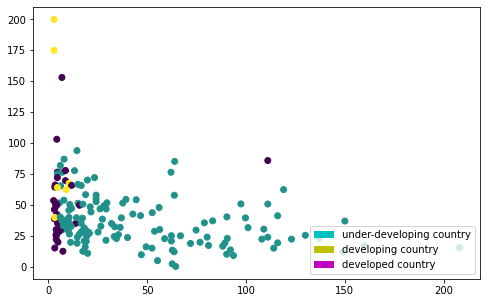

In [22]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8,5))

classes = ['under-developing country', 'developing country', 'developed country']
colours = ['c','y','m']
leg = []
for i in range(0,len(colours)):
    leg.append(mpatches.Rectangle((0,0),1,1,fc=colours[i]))
plt.legend(leg,classes,loc=4)
plt.scatter(x.values[:,0],x.values[:,1], c=km.labels_)
plt.show()